<a href="https://colab.research.google.com/github/nikneural/ML/blob/master/%D0%B1%D0%B8%D1%80%D0%B6%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [4]:
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/libta-lib0_0.4.0-oneiric1_amd64.deb -qO libta.deb
!wget https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files/ta-lib0-dev_0.4.0-oneiric1_amd64.deb -qO ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib as ta

Selecting previously unselected package libta-lib0.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) ...
Selecting previously unselected package ta-lib0-dev.
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

     |████████████████████████████████| 269 kB 4.1 MB/s 
  Created wheel for ta-lib: filename=TA_Lib-0.4.24-cp37-cp37m-linux_x86_64.whl size=1465729 sha256=bc9ea1d91c611a40eb693b48210fe44695b931d4ebf64cf096f919d10344422a
  Stored in directory: /root/.cache/pip/wheels/02/b1/a5/aca31e8cdd0137d7a83bf72237056b8705663dd1f9b5eac11e
Successfully built ta-lib


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Загрузка данных

In [8]:
dtype_change = {
    'OPEN': np.float32,
    'HIGH': np.float32,
    'LOW': np.float32,
    'CLOSE': np.float32,
    'VOLUME': np.float32,
    'MACD': np.float32,
    'SIG': np.float32,
    'HIST': np.float32,
    'RSI': np.float32,
    'EMA_7': np.float32,
    'EMA_25': np.float32,
    'EMA_99': np.float32,
    'OBV': np.float32,
    'AD': np.float32,
    'BBU': np.float32,
    'ATR': np.float32,
    'Date': np.int32,
    'Time': np.int32,
    'trades_up': np.float32,
    'trades_down': np.float32
}

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv', index_col=0, dtype=dtype_change)

# График OBV и OPEN

In [11]:
import matplotlib.pyplot as plt
import pandas as pd


class PlotFeatures:
    @staticmethod
    def _plot_single(data: pd.DataFrame,
                     column: str):
        plt.plot(data.index.values, data[column], ds='steps-post')

    @staticmethod
    def _plot_double(data: pd.DataFrame,
                     column: str,
                     main_col: str):
        color = 'tab:red'
        plt.ylabel(column)
        plt.plot(data[column], color=color, alpha=0.6)
        ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis
        color = 'tab:blue'
        ax2.set_ylabel(main_col, color=color)  # we already handled the x-label with ax1
        ax2.plot(data[main_col], color=color, alpha=0.4)
        ax2.tick_params(axis='y', labelcolor=color)

    @staticmethod
    def plot_all(data: pd.DataFrame, main_col: str = None, size: tuple = (30, 3)):
        """
        Print each series in dataset as a trend
        data: pd.DataFrame
        main_col: string. If specified draws second trend with main_col data for each plot
        size: (width, height per trend)
        """
        i = 1
        if main_col:
            plot_data = PlotFeatures._plot_double
        else:
            plot_data = PlotFeatures._plot_single
        plt.figure(figsize=(size[0], 3 + size[1] * len(data.columns)))
        for column in data.columns:
            plt.subplot(len(data.columns), 1, i)
            plot_data(data, column, main_col)
            i += 1


class PlotStrategy:
    def __init__(self, data: pd.DataFrame):
        self.data = data
        self.index = data.index.values
        self.last_plot = None
        self.fig = plt.figure(figsize=(50, 5))

    def save_fig(self, path: str):
        self.last_plot.savefig(path, bbox_inches='tight')

    def _set_base_params(self, axs=None):
        if axs is not None:
            self.axs = axs
        else:
            self.axs = plt
        self.axs.grid()
        self.axs.plot(self.index, [0 for x in self.index], color='C5', visible=1)

    def close(self, axs=None):
        self._set_base_params(axs)
        self.axs.plot(self.index, self.data['CLOSE'], label='CLOSE')
        if 'ylim' in dir(self.axs):
            self.axs.ylim([self.data['CLOSE'].min(), self.data['CLOSE'].max()])
        else:
            self.axs.set_ylim([self.data['CLOSE'].min(), self.data['CLOSE'].max()])
        self.axs.legend(loc='upper left')
        self.last_plot = self.fig

    def maprob(self, axs=None):
        self._set_base_params(axs)
        self.axs.plot(self.index, self.data['ma_proba'], ds='steps-post', label='ma_proba', color='C1')
        self.axs.plot(self.index, self.data['bbu_proba'], ds='steps-post', label='ma_proba_bbu', color='C3')
        self.axs.plot(self.index, self.data['bbl_proba'], ds='steps-post', label='ma_proba_bbl', color='C2')
        self.axs.legend(loc='upper left')
        self.last_plot = self.fig

    def madcl(self, axs=None):
        self._set_base_params(axs)
        self.axs.plot(self.index, self.data['ma_d_close'], ds='steps-post', label='ma_d_close', color='C1')
        self.axs.plot(self.index, self.data['bbu_d_close'], ds='steps-post', label='ma_d_close_bbu', color='C3')
        self.axs.plot(self.index, self.data['bbl_d_close'], ds='steps-post', label='ma_d_close_bbl', color='C2')
        self.axs.legend(loc='upper left')
        self.last_plot = self.fig

    def d_prc(self, axs=None, label='profit'):
        self._set_base_params(axs)
        self.axs.plot(self.index, self.data['d_prc'], ds='steps-post', label=label)
        if 'profit' in self.data.columns:
            self.axs.plot(self.index, self.data['profit'], ds='steps-post', label=label)
        self.axs.legend(loc='upper left')
        self.last_plot = self.fig

    def trade_s(self, axs=None):
        self._set_base_params(axs)
        delta = self.data['CLOSE'].max() - self.data['CLOSE'].min()
        self.axs.plot(self.index, (self.data['CLOSE'] - self.data['CLOSE'].min()) / delta * 3, label='CLOSE', alpha=0.5,
                      color='black')
        self.axs.plot(self.index, self.data['sell_dcl'] * 2, ds='steps-post', linewidth=3, label='sell_dcl')
        self.axs.plot(self.index, self.data['permission'] * 3, ds='steps-post', label='permission')
        self.axs.plot(self.index, self.data['prob_permission'] * 0.5 - 1, ds='steps-post', label='prob_permission')
        self.axs.plot(self.index, self.data['trade_s'], ds='steps-post', linewidth=3, label='trade_signal')
        self.axs.plot(self.index, self.data['y_pred_up'] * 3, ds='steps-post', label='proba')
        if 'aux1' in self.data.columns:
            self.axs.plot(self.index, self.data['aux1'] * 0.3 - 1, ds='steps-post',
                          label='aux1')
        if 'aux2' in self.data.columns:
            self.axs.plot(self.index, self.data['aux2'] * 0.3 - 2, ds='steps-post',
                          label='aux2')
        if 'aux3' in self.data.columns:
            self.axs.plot(self.index, self.data['aux3'] * 0.3 - 3, ds='steps-post',
                          label='aux3')
        if 'min_proba' in self.data.columns:
            self.axs.plot(self.index, self.data['min_proba'] * 3, ds='steps-post', label='min_proba')
        if 'sell_min_prob' in self.data.columns:
            self.axs.plot(self.index, self.data['sell_min_prob'] * 2, ds='steps-post', label='sell_min_prob')
        self.axs.legend(loc='upper left')
        self.last_plot = self.fig

    def unite(self, output=None):
        if output is None:
            output = ['d_prc', 'close', 'trade_s', 'maprob', 'madcl']
        n_plots = len(output)
        plot_heights = {'d_prc': 1, 'close': 1, 'trade_s': 2, 'maprob': 1, 'madcl': 1}
        height_ratios = [plot_heights.get(key) for key in output]
        sum_height = sum(height_ratios) * 5
        fig, axs = plt.subplots(n_plots, figsize=(50, sum_height), gridspec_kw={'height_ratios': height_ratios})
        for i, plot_set in enumerate(output):
            f = getattr(self, plot_set)
            f(axs[i])
        self.last_plot = fig


In [12]:
f = PlotFeatures()

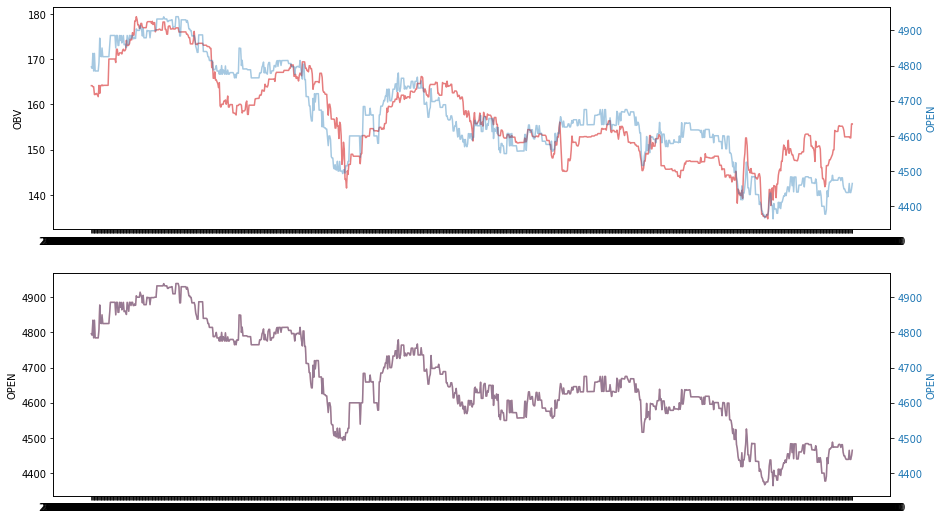

In [13]:
f.plot_all(data.iloc[:1000][['OBV', 'OPEN']], main_col='OPEN', size=(15,3))

In [14]:
data['MFI'] = ta.MFI(data.HIGH, data.LOW,  data.CLOSE,  data.VOLUME) 
data['MFI1'] = ta.MA(data['MFI'], 1)
data['MFI10'] = ta.MA(data['MFI'], 10) 
data['MFI100'] = ta.MA(data['MFI'], 100) 
data['MFI400'] = ta.MA(data['MFI'], 400)

In [15]:
data.VOLUME+=0.000001
data['pVOLUME']=data['VOLUME']*((data.CLOSE-data.OPEN)>=0)+0.000001
data['nVOLUME']=data['VOLUME']*((data.CLOSE-data.OPEN)<0)+0.000001
data['p-nVOLUME']=data['pVOLUME']-data['nVOLUME']

### Процент данных, в которых OPEN и CLOSE равны

In [16]:
round((data[data["OPEN"] == data['CLOSE']].shape[0] / data.shape[0]) * 100, 2)

2.67

# Скользящие квантили pVOLUME и nVOLUME

In [17]:
pvolume1d = data['pVOLUME'].rolling(24*60).quantile(0.99)
pvolume1w = data['pVOLUME'].rolling(24*7*60).quantile(0.99)
pvolume2w = data['pVOLUME'].rolling(24*14*60).quantile(0.99)
pvolume1m = data['pVOLUME'].rolling(24*28*60).quantile(0.99)
pvolume1d = pd.DataFrame(pvolume1d)
pvolume1w = pd.DataFrame(pvolume1w)
pvolume2w = pd.DataFrame(pvolume2w)
pvolume1m = pd.DataFrame(pvolume1m)

In [18]:
nvolume1d = data['nVOLUME'].rolling(24*60).quantile(0.99)
nvolume1w = data['nVOLUME'].rolling(24*7*60).quantile(0.99)
nvolume2w = data['nVOLUME'].rolling(24*14*60).quantile(0.99)
nvolume1m = data['nVOLUME'].rolling(24*28*60).quantile(0.99)
nvolume1d = pd.DataFrame(nvolume1d)
nvolume1w = pd.DataFrame(nvolume1w)
nvolume2w = pd.DataFrame(nvolume2w)
nvolume1m = pd.DataFrame(nvolume1m)

 ### Данные, где квантиль скользяшей медианы меньше, чем 99 квантиль

In [19]:
pmedian_1d = data[data['VOLUME'] > pvolume1d['pVOLUME']]
pmedian_1w = data[data['VOLUME'] > pvolume1w['pVOLUME']]
pmedian_2w = data[data['VOLUME'] > pvolume2w['pVOLUME']]
pmedian_1m = data[data['VOLUME'] > pvolume1m['pVOLUME']]

In [20]:
nmedian_1d = data[data['VOLUME'] > nvolume1d['nVOLUME']]
nmedian_1w = data[data['VOLUME'] > nvolume1w['nVOLUME']]
nmedian_2w = data[data['VOLUME'] > nvolume2w['nVOLUME']]
nmedian_1m = data[data['VOLUME'] > nvolume1m['nVOLUME']]

In [21]:
data['pmedian_1d'] = np.NaN
data['pmedian_1w'] = np.NaN
data['pmedian_2w'] = np.NaN
data['pmedian_1m'] = np.NaN
data['nmedian_1d'] = np.NaN
data['nmedian_1w'] = np.NaN
data['nmedian_2w'] = np.NaN
data['nmedian_1m'] = np.NaN

In [22]:
data.loc[pmedian_1d["pVOLUME"].index, 'pmedian_1d'] = pmedian_1d['pVOLUME']
data.loc[pmedian_1w["pVOLUME"].index, 'pmedian_1w'] = pmedian_1w['pVOLUME']
data.loc[pmedian_2w["pVOLUME"].index, 'pmedian_2w'] = pmedian_2w['pVOLUME']
data.loc[pmedian_1m["pVOLUME"].index, 'pmedian_1m'] = pmedian_1m['pVOLUME']
data.loc[nmedian_1d["nVOLUME"].index, 'nmedian_1d'] = nmedian_1d['nVOLUME']
data.loc[nmedian_1w["nVOLUME"].index, 'nmedian_1w'] = nmedian_1w['nVOLUME']
data.loc[nmedian_2w["nVOLUME"].index, 'nmedian_2w'] = nmedian_2w['nVOLUME']
data.loc[nmedian_1m["nVOLUME"].index, 'nmedian_1m'] = nmedian_1m['nVOLUME']

In [23]:
data.loc[data['pmedian_1d'].isna() == True, ['pmedian_1d']] = 0
data.loc[data['pmedian_1w'].isna() == True, ['pmedian_1w']] = 0
data.loc[data['pmedian_2w'].isna() == True, ['pmedian_2w']] = 0
data.loc[data['pmedian_1m'].isna() == True, ['pmedian_1m']] = 0
data.loc[data['nmedian_1d'].isna() == True, ['nmedian_1d']] = 0
data.loc[data['nmedian_1w'].isna() == True, ['nmedian_1w']] = 0
data.loc[data['nmedian_2w'].isna() == True, ['nmedian_2w']] = 0
data.loc[data['nmedian_1m'].isna() == True, ['nmedian_1m']] = 0

# **Импульсы**

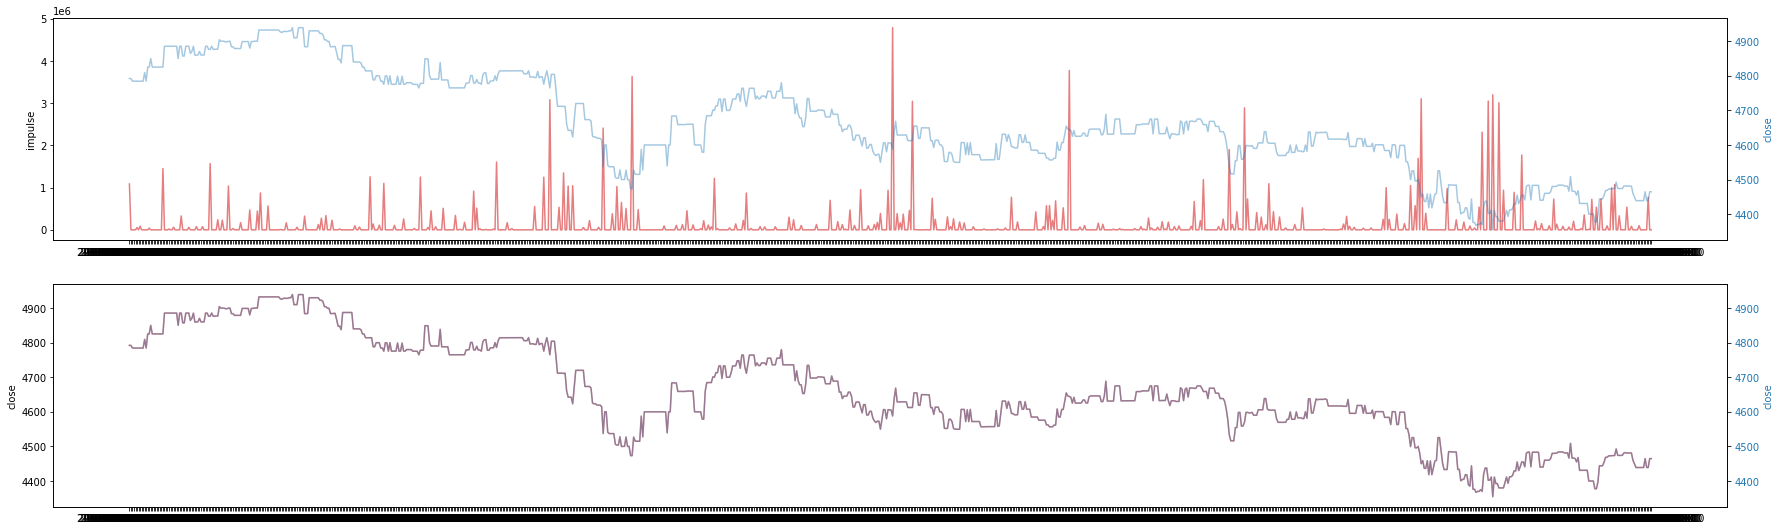

In [ ]:
f.plot_all(impulse.iloc[:1000][['impulse', 'close']], main_col='close')

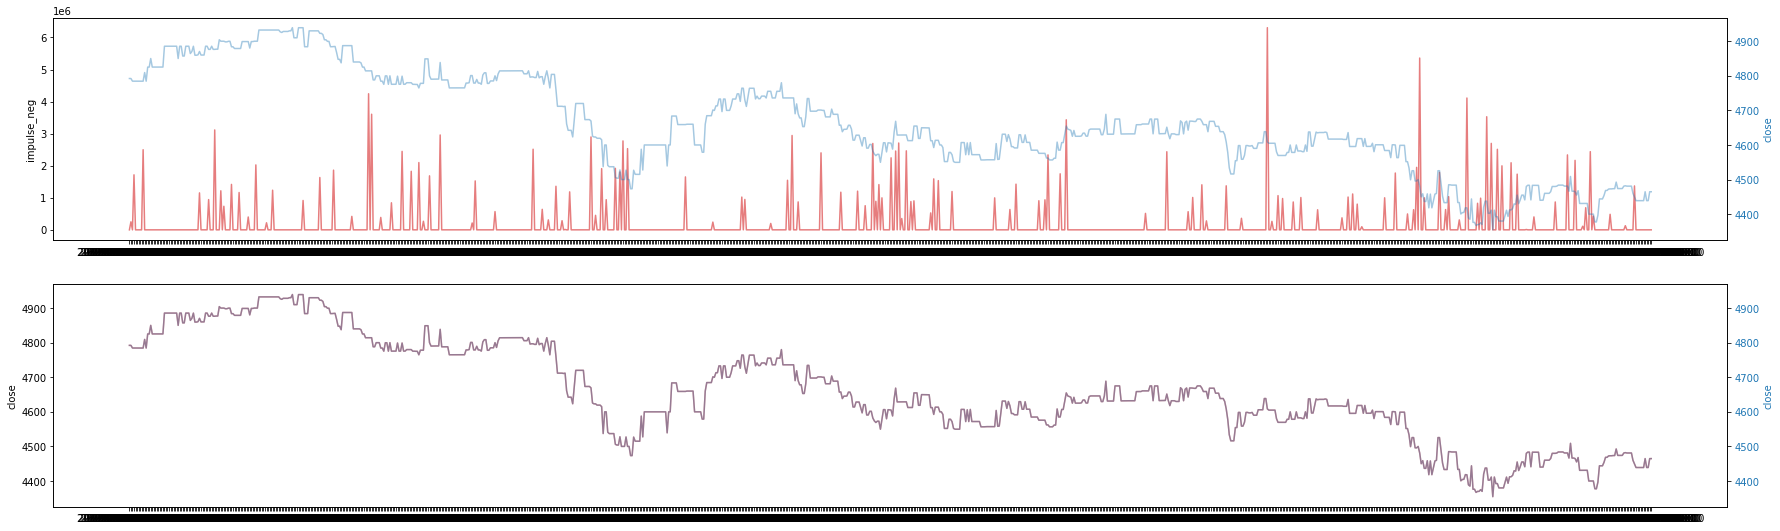

In [ ]:
f.plot_all(impulse.iloc[:1000][['impulse_neg', 'close']], main_col='close')

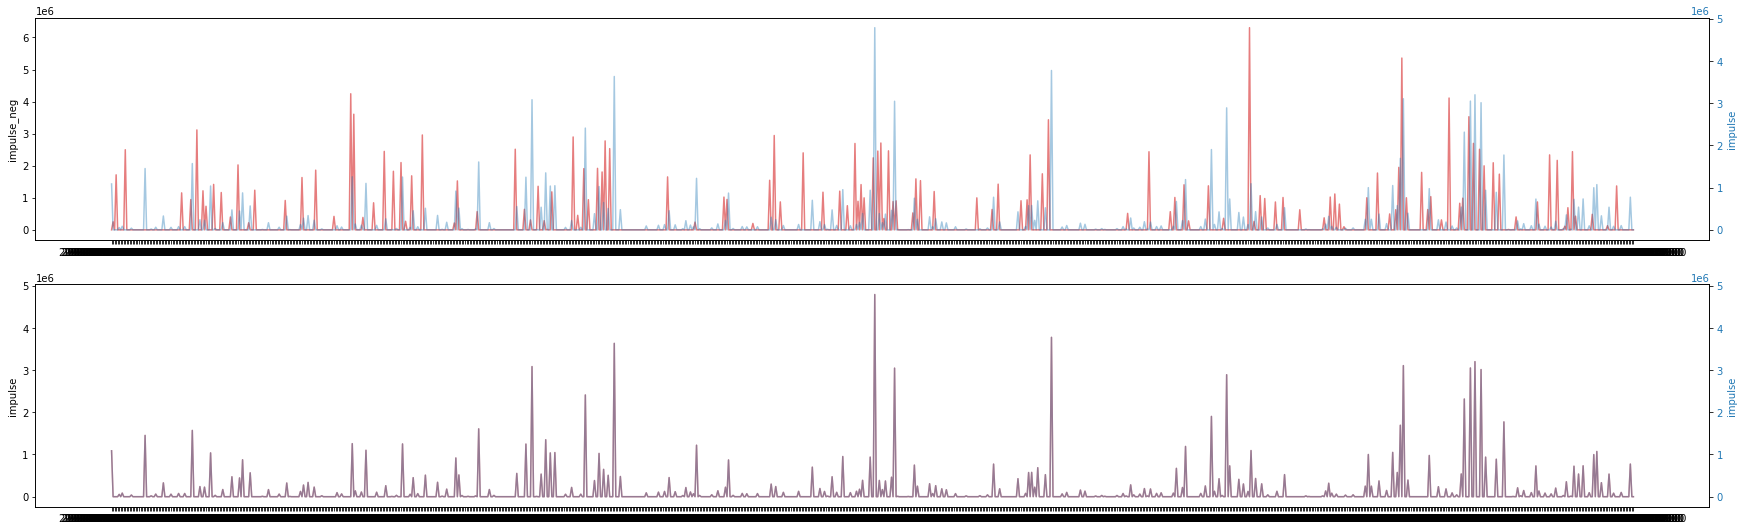

In [ ]:
f.plot_all(impulse.iloc[:1000][['impulse_neg', 'impulse']], main_col='impulse')

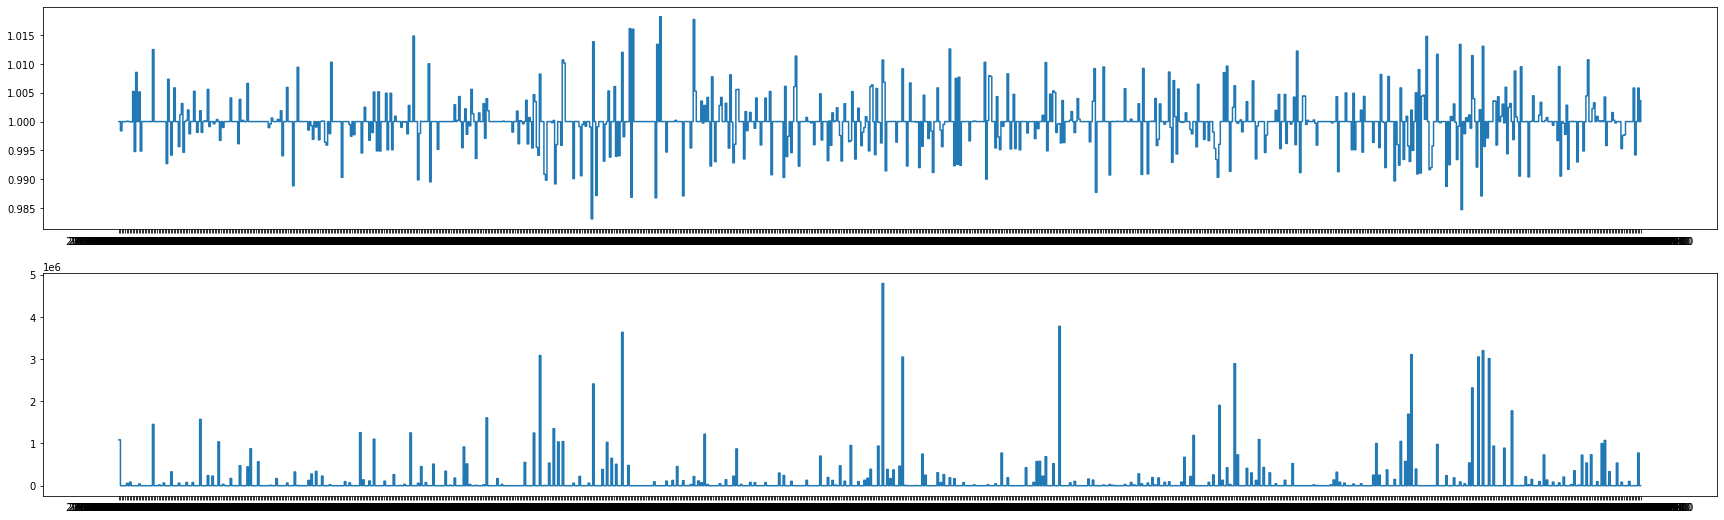

In [ ]:
f.plot_all(impulse.iloc[:1000][['cost_change', 'impulse']])

### Минутные, 5 минутные импульсы

In [ ]:
pvolume1m = data['pVOLUME'].rolling(1).sum()
pvolume5m = data['pVOLUME'].rolling(5).sum()
pvolume10m = data['pVOLUME'].rolling(10).sum()
pvolume20m = data['pVOLUME'].rolling(20).sum()
pvolume60m = data['pVOLUME'].rolling(60).sum()
pvolume1m = pd.DataFrame(pvolume1m)
pvolume5m = pd.DataFrame(pvolume5m)
pvolume10m = pd.DataFrame(pvolume10m)
pvolume20m = pd.DataFrame(pvolume20m)
pvolume60m = pd.DataFrame(pvolume60m)

In [25]:
nvolume1m = data['nVOLUME'].rolling(1).sum()
nvolume5m = data['nVOLUME'].rolling(5).sum()
nvolume10m = data['nVOLUME'].rolling(10).sum()
nvolume20m = data['nVOLUME'].rolling(20).sum()
nvolume60m = data['nVOLUME'].rolling(60).sum()
nvolume1m = pd.DataFrame(nvolume1m)
nvolume5m = pd.DataFrame(nvolume5m)
nvolume10m = pd.DataFrame(nvolume10m)
nvolume20m = pd.DataFrame(nvolume20m)
nvolume60m = pd.DataFrame(nvolume60m)

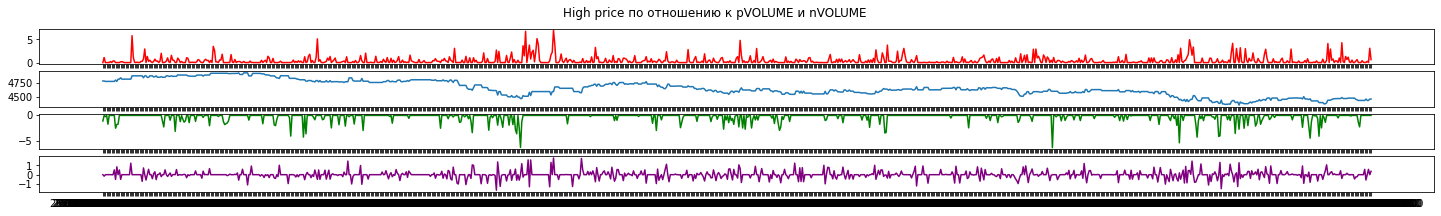

In [ ]:
fig, axs = plt.subplots(4, figsize=(25, 3))
fig.suptitle('High price по отношению к pVOLUME и nVOLUME')

axs[0].plot(impulses.iloc[:1000]['pVOLUME_1min'], color='red')
axs[1].plot(impulses.iloc[:1000]['close'])
axs[2].plot(impulses.iloc[:1000]['nVOLUME_1min'].apply(lambda x: -x), color='green')
axs[3].plot(impulses.iloc[:1000]['percent_cost_change'], color='purple')

In [ ]:
value_of_impulses = pd.DataFrame()

In [ ]:
value_of_impulses['pos_impulse'] = impulses['pVOLUME_1min']
value_of_impulses['neg_impulse'] = impulses['nVOLUME_1min']

In [ ]:
value_of_impulses['close'] = impulses['close']

In [ ]:
value_of_impulses['percent_close_1min'] = value_of_impulses['close'].shift(-1) / value_of_impulses['close'] * 100 - 100
value_of_impulses['percent_close_5min'] = (value_of_impulses['close'].shift(-5) / value_of_impulses['close']) * 100 - 100
value_of_impulses['percent_close_10min'] = (value_of_impulses['close'].shift(-10) / value_of_impulses['close']) * 100 - 100
value_of_impulses['percent_close_20min'] = (value_of_impulses['close'].shift(-20)/ value_of_impulses['close']) * 100 - 100
value_of_impulses['percent_close_30min'] = (value_of_impulses['close'].shift(-30)/ value_of_impulses['close']) * 100 - 100

In [ ]:
value_of_impulses

,pos_impulse,neg_impulse,close,percent_close_1min,percent_close_5min,percent_close_10min,percent_close_20min,percent_close_30min
TIME,,,,,,,,
2017-09-02 00:30:00,0.000001,1.092558,4792.189941,0.000000,-0.161926,0.358711,0.691132,1.948166
2017-09-02 00:31:00,1.087047,0.000001,4792.189941,-0.159851,-0.155457,-0.161507,0.691132,1.948166
2017-09-02 00:32:00,0.000001,0.250802,4784.529785,0.000000,0.004402,0.850044,0.852333,1.368584
2017-09-02 00:33:00,0.000004,0.000001,4784.529785,-0.002083,0.004181,0.850044,2.111389,2.111389
2017-09-02 00:34:00,0.000001,1.715964,4784.430176,0.000000,0.000000,1.370476,2.113510,2.113510
...,...,...,...,...,...,...,...,...
2022-04-04 12:15:00,7.139414,0.000001,46223.488281,-0.039581,NaN,NaN,NaN,NaN
2022-04-04 12:16:00,0.000001,13.251994,46205.191406,-0.008408,NaN,NaN,NaN,NaN
2022-04-04 12:17:00,0.000001,23.947684,46201.308594,0.000000,NaN,NaN,NaN,NaN


In [ ]:
indicator = []
for i in tqdm(range(1, data.shape[0])):
  PVT = data['VOLUME'][i] * ((data['CLOSE'][i] / data['CLOSE'][i-1])/ data['CLOSE'][i-1])
  PVT_next = PVT + ((data['CLOSE'][i+1] / data['CLOSE'][i])/ data['CLOSE'][i])
  indicator.append(PVT_next)


100%|█████████▉| 2412708/2412709 [01:28<00:00, 27285.24it/s]


IndexError: ignored

In [ ]:
pvolume1min = data['pVOLUME'].rolling(1).mean()

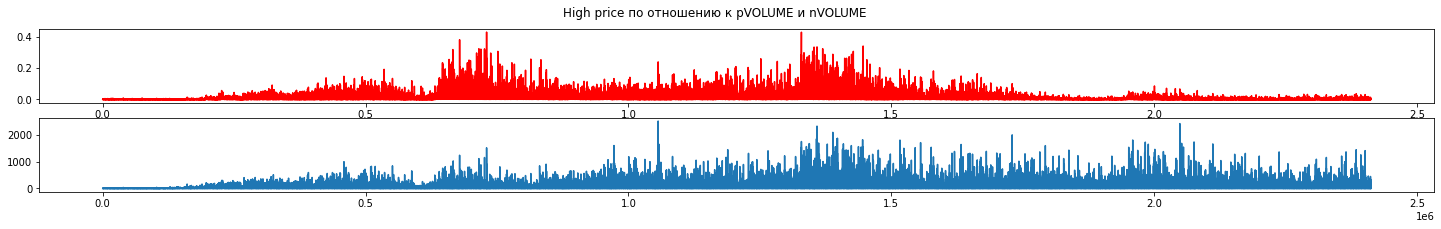

In [ ]:
fig, axs = plt.subplots(2, figsize=(25, 3))
fig.suptitle('High price по отношению к pVOLUME и nVOLUME')

axs[0].plot(indicator, color='red')
axs[1].plot(pvolume1min.values)

In [ ]:
pvolume1min

TIME
2017-09-02 00:30:00    0.000001
2017-09-02 00:31:00    1.087047
2017-09-02 00:32:00    0.000001
2017-09-02 00:33:00    0.000004
2017-09-02 00:34:00    0.000001
                         ...   
2022-04-04 12:15:00    7.139414
2022-04-04 12:16:00    0.000001
2022-04-04 12:17:00    0.000001
2022-04-04 12:18:00    0.000001
2022-04-04 12:19:00    0.000001
Name: pVOLUME, Length: 2412710, dtype: float64